<a href="https://colab.research.google.com/github/grievous-mischievous7/NNDL_LAB/blob/main/Spring_22_NNDL_Lab_2_190020028.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 2 : Multi Class Classification Using Perceptron 

Name :**Neville Thomas Sebastian**

Roll Number :**190020028** 



# **Problem 1** : Demonstrate the 2-input, 2-output neural network, to perform 4 class, classification task.

  1. Generate appropriate data synthetically (Ex: Multivariate Gaussian data with different mean vectors and Identity covariance matrix can be used )
  2. Have to convert the class labels (0, 1, 2, 3) to its corresponding binary value.
  3. Use appropriate activation function and learning rule .
  4. Draw the learned separating hyper planes in each iteration. (using the information
  from the learned weights).
  5. After the network is learned, a independent test set can be used to validate the performance. (Performance can be shown through accuracy/error percentage, justify
  the error by drawing the separating hyper-plane over the test set data (use different
  color code for different class label) )

## OBJECTIVE:
**Implementing 2-input,2-output neural network , to perform 4 class, classification task.**

## HYPOTHESIS:

**The neural network model should be able to find the weights using the perceptron learning law.**

## EXPERIMENTAL DESCRIPTION

1.   For this neural network model we intially generate multivariate gaussian data , then we augment the data and then label it.
2.   Then we define the function perceptron_learning_loop() on the basis of perceptron learning law.
3.   After training the model we test the model with the test data.

## Programming : 
  Please write a program to demonstrate the same

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

def GenerateData(No_training,mean,variance):

  data = []
  ## Write your code here
  data=np.random.multivariate_normal(mean,variance,size=No_training,check_valid='warn',tol=1e-8)#multivariate gaussian function
  return data

In [2]:
## Define Mean and Variance for all the data points
No_training=1000
data=[]
j=[]
mean=[[0,0],[0,20],[20,0],[20,20]]#initialising mean vectors
variance=np.eye(2)#covarinace matrix
for i in mean:
  j.append(GenerateData(No_training,i,variance))#appending generated data to a list
#print(np.array(j))
#print(data[0][0][1])
#print(data[1])
j=np.array(j)
j.shape

(4, 1000, 2)

In [3]:
## Augment the Data 
data=np.concatenate((j[0],j[1],j[2],j[3]),axis=0) #concatenating the data to create a (4000,2) matrix
data_aug=np.concatenate((data,np.ones((data.shape[0],1))),axis=1) #augmenting data, adding 1 to each row , matrix becomes (4000,3)
#print(data_aug)
data_aug.shape

(4000, 3)

In [4]:
## Define Target Labels
c1=np.tile([-1,-1],(No_training,1)) #initializing classes. 
c2=np.tile([-1,1],(No_training,1))
c3=np.tile([1,-1],(No_training,1))
c4=np.tile([1,1],(No_training,1))
target=np.concatenate((c1,c2,c3,c4),axis=0)
target.shape
#print(target)

(4000, 2)

New Weights are:
[[ 115.86747767  -51.03309971 -435.34      ]
 [ -67.79630697  117.02097883 -437.94      ]]
the norm error is: 0.0


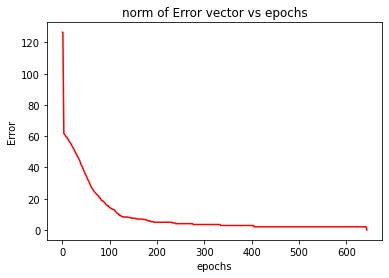

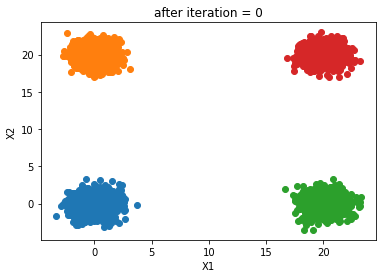

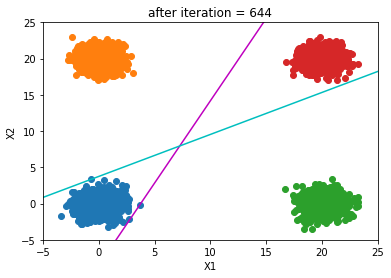

In [5]:
lr=0.01
epochs=1000
w_initial=np.array([[0,0,1],[0,0,1]])#2*3 matrix

def perceptron_learning_loop(inp,target,w,lr,epochs):
  ## Write your code here
  INP = np.transpose(inp) #3*4000 matrix
  error = []
  w_new = w_initial      
  err = 100
  k = 0
  while k<epochs and err>0.01:
      s = w_new@INP # weighted sum of inputs matrix,dimension is 2*4000
      error_vec = np.transpose(target) - np.sign(s) #dimension is 2*4000
      dw  = lr * error_vec@inp 
      w_new = w_new + dw
      err= np.linalg.norm(error_vec)
      k +=1
      error.append(err)
  return w_new,error,k
w_new, error ,k = perceptron_learning_loop(data_aug,target,w_initial,lr,epochs)
print("New Weights are:")
print(w_new)
print("the norm error is:",error[-1])
print('===============================================================================')
plt.plot(error, label='Error convergence',color='r')
plt.title('norm of Error vector vs epochs')
plt.xlabel('epochs')
plt.ylabel('Error')
plt.show()
print('===============================================================================')
#===============================================================================
#after iteration=0
for i in range(j.shape[0]):
  plt.scatter(j[i,:,0],j[i,:,1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('after iteration = 0')
plt.show()
print('===============================================================================')
#===============================================================================
#after iteration=0
for i in range(j.shape[0]):
  plt.scatter(j[i,:,0],j[i,:,1])
x1=np.linspace(-5,30,35)
x12=(-w_new[0,2]-w_new[0,0]*x1)/w_new[0,1]
x22=(-w_new[1,2]-w_new[1,0]*x1)/w_new[1,1]
plt.plot(x1,x12,color='m')
plt.plot(x1,x22,color='c')
plt.xlabel('X1')
plt.ylabel('X2')
limits = [ -5, 25, -5, 25]
plt.axis(limits)
plt.title('after iteration = '+ str(k))
plt.show()
print('===============================================================================')

In [19]:
## Testing
No_testing=10
c1=np.tile([-1,-1],(No_testing,1)) #initializing classes. 
c2=np.tile([-1,1],(No_testing,1))
c3=np.tile([1,-1],(No_testing,1))
c4=np.tile([1,1],(No_testing,1))
target=np.concatenate((c1,c2,c3,c4),axis=0)
data=[]
j=[]
k=1
mean=[[0,0],[0,20],[20,0],[20,20]]
variance=np.eye(2)
for i in mean:
  j=GenerateData(No_testing,i,variance)
  j=np.concatenate((j,np.ones((j.shape[0],1))),axis=1)
  predicted_data = np.sign(np.transpose(w_new@np.transpose(j)))
  start=0+(k-1)*No_testing
  end=k*No_testing
  err_vec=target[start:end,]-predicted_data
  err= np.linalg.norm(err_vec)
  print(predicted_data)
  print('error = '+str(err))
  print("______________________________________________")
  k+=1

[[-1. -1.]
 [-1. -1.]
 [-1. -1.]
 [-1. -1.]
 [-1. -1.]
 [-1. -1.]
 [-1. -1.]
 [-1. -1.]
 [-1. -1.]
 [-1. -1.]]
error = 0.0
______________________________________________
[[-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]
 [-1.  1.]]
error = 0.0
______________________________________________
[[ 1. -1.]
 [ 1. -1.]
 [ 1. -1.]
 [ 1. -1.]
 [ 1. -1.]
 [ 1. -1.]
 [ 1. -1.]
 [ 1. -1.]
 [ 1. -1.]
 [ 1. -1.]]
error = 0.0
______________________________________________
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
error = 0.0
______________________________________________


## Inferences and Conclusion : State all the key observations and conclusion

## INFERENCE:


*   List item
*   List item
*   List item
*   List item


## CONCLUSION:


*   List item
*   List item
*   List item
*   List item

